<h4>Here,  I intend to using SMOTE to oversample the classification target variable</h4>

In [32]:
# necessary modules are imported 
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

In [33]:
# here is already cleaned dataset
# and not needed columns are dropped
df = pd.read_csv("car_purchasingNew1.csv", encoding='ISO-8859-1')

<Axes: xlabel='car_purchase_amount', ylabel='Count'>

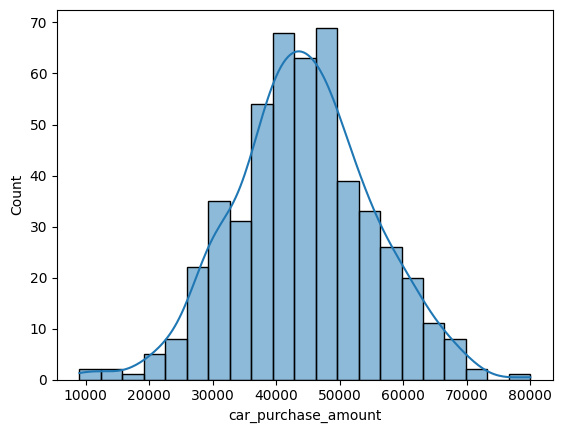

In [34]:
# the distribution is neither balanced nor normal yet
# in this case
# from the plot it is close to normal
sns.histplot(data=df, x="car_purchase_amount", kde=True)

In [35]:
df

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net worth,car_purchase_amount
0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,41,87384.60,97729.16,837.79,185951.55,185951.55,6995.902524,541670.1016,48901.44342
496,38,123105.00,38790.92,23865.00,185760.92,185760.92,12301.456790,360419.0988,31491.41457
497,54,185724.50,0.00,0.00,185724.50,185724.50,10611.606860,764531.3203,64147.28888
498,59,185724.50,0.00,0.00,185724.50,185724.50,14013.034510,337826.6382,45442.15353


In [36]:
# for statistic purpose
df.describe()

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net worth,car_purchase_amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,46.224000,151066.630020,34445.373900,25762.908120,211274.912040,211274.912040,9607.645049,431475.713625,44209.799218
std,7.990339,44402.930342,37322.379903,33597.479055,34040.951398,34040.951398,3489.187973,173536.756340,10773.178744
min,20.000000,25400.000000,0.000000,0.000000,185724.500000,185724.500000,100.000000,20000.000000,9000.000000
25%,41.000000,116316.357500,0.000000,10161.332500,192696.077500,192696.077500,7397.515792,299824.195900,37629.896040
50%,46.000000,140546.895000,24079.420000,17475.785000,200595.255000,200595.255000,9655.035568,426750.120650,43997.783390
75%,52.000000,188314.510000,64893.007500,28726.082500,217400.320000,217400.320000,11798.867487,557324.478725,51254.709517
max,70.000000,294580.020000,245131.880000,400184.250000,567595.430000,567595.430000,20000.000000,1000000.000000,80000.000000


<h4>I think same as CTGAN, the columns related to pay such as BasePay, OvertimePay, OtherPay, TotalPay have relatively large standard deviations, meaning these values are spread out quite a bit (over fit). I think the distribution might be right-skewed, with a small number of individuals receiving much higher pay. These features perhaps be combined together due to the relationship between them.
I also think the net worth and credit_card_debt columns have significant variability, which might imply that there's a broad range of financial profiles in the dataset, from individuals with low or no debt to individuals with significant assets.
Also, I believe the car_purchase_amount probably have substantial range and relatively high standard deviation, indicating that while most people spend around 60,000, some spend significantly more or less.</h4>

In [37]:
# For calculating the variance
# in each column of DataFrame
df.var()

age                    6.384552e+01
BasePay                1.971620e+09
OvertimePay            1.392960e+09
OtherPay               1.128791e+09
TotalPay               1.158786e+09
TotalPayBenefits       1.158786e+09
credit_card_debt       1.217443e+07
net worth              3.011501e+10
car_purchase_amount    1.160614e+08
dtype: float64

<h4>From the above output I think, high Variance attributes are related to pay, like BasePay, OvertimePay, OtherPay, and TotalPay because they have large variances. This suggests that these features have a wide spread in values, possibly due to a few individuals with exceptionally high pay.
Low Variance are attributes to like age and credit_card_debt have much lower variance, suggesting more consistency in these values across the dataset.
Then I think, high variance values indicate that the features with large numbers such as pay, net worth have a wide spread of values, which perhaps related to the data. However, I still believe features such as  age, credit_card_debt are tend to have smaller variance.</h4>

In [38]:
# For Correlation
df.corr()

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net worth,car_purchase_amount
age,1.000000,0.027126,-0.021949,0.018628,0.029704,0.029704,0.031748,0.021794,0.633273
BasePay,0.027126,1.000000,-0.672868,-0.348767,0.222444,0.222444,-0.000827,0.047976,0.037602
OvertimePay,-0.021949,-0.672868,1.000000,-0.025440,0.193601,0.193601,0.030913,-0.036167,-0.031566
OtherPay,0.018628,-0.348767,-0.025440,1.000000,0.504150,0.504150,0.048652,0.002825,-0.008536
TotalPay,0.029704,0.222444,0.193601,0.504150,1.000000,1.000000,0.080833,0.025714,0.006014
TotalPayBenefits,0.029704,0.222444,0.193601,0.504150,1.000000,1.000000,0.080833,0.025714,0.006014
credit_card_debt,0.031748,-0.000827,0.030913,0.048652,0.080833,0.080833,1.000000,-0.049378,0.028882
net worth,0.021794,0.047976,-0.036167,0.002825,0.025714,0.025714,-0.049378,1.000000,0.488580
car_purchase_amount,0.633273,0.037602,-0.031566,-0.008536,0.006014,0.006014,0.028882,0.488580,1.000000



<h4><bCorrelation</b>
I would say there is strong relationships between features that have moderate positive correlation between features such as age and car_purchase_amount, and a perfect correlation between TotalPay and TotalPayBenefits.
WI think there is weak relationships especially between Pay-related variables such as BasePay, OvertimePay, OtherPay. They show weak positive or negative correlations with other factors, like comparing to that of credit_card_debt or net worth.
Car purchases: A moderately strong correlation exists between car_purchase_amount and net worth, but weak correlations with other Pay variables like total pay or credit_card_debt.</h4>

In [39]:
# This line of code is to achieve
# the sampling strategy
df['car_purchase_amount'].value_counts()

car_purchase_amount
35321.45877    1
31526.04931    1
59096.26978    1
28733.68779    1
23517.91983    1
              ..
46453.34819    1
57125.41541    1
37714.31659    1
39433.40631    1
45107.22566    1
Name: count, Length: 500, dtype: int64

<h2><b>Now Using SMOTE tool method<b></h2>

In [40]:
from sklearn.impute import SimpleImputer

target = 'car_purchase_amount'

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
df[target] = imputer.fit_transform(df[[target]])

# Check if missing values are handled
print(f"Missing values after median imputation: {df[target].isnull().sum()}")

# If still missing values exist, impute with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df[target] = imputer.fit_transform(df[[target]])

# Check again if any missing values remain
print(f"Missing values after most frequent imputation: {df[target].isnull().sum()}")


Missing values after median imputation: 0
Missing values after most frequent imputation: 0


In [41]:
from sklearn.preprocessing import KBinsDiscretizer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Bin the 'car_purchase_amount' column into categories (e.g., 5 bins)
n_bins = 5  # Number of bins
binning = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
y_binned = binning.fit_transform(df[target].values.reshape(-1, 1)).flatten()  # Flatten to 1D array

# Add the binned target column to the DataFrame
df['binned_car_purchase_amount'] = y_binned

# Check the distribution of the binned target variable before resampling
bin_counts = df['binned_car_purchase_amount'].value_counts()
print("Bin counts before resampling:")
print(bin_counts)

# Create the SMOTE sampling strategy based on bin counts
strategy = {bin_label: max(bin_counts) for bin_label in bin_counts.index}

# Apply SMOTE for oversampling
X = df[['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits', 'credit_card_debt', 'net worth']]
y = df['binned_car_purchase_amount']

smote = SMOTE(sampling_strategy=strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['binned_car_purchase_amount'] = y_resampled

# Check the resampled dataset
print("Resampled dataset:")
print(df_resampled['binned_car_purchase_amount'].value_counts())


Bin counts before resampling:
binned_car_purchase_amount
0.0    100
2.0    100
4.0    100
3.0    100
1.0    100
Name: count, dtype: int64
Resampled dataset:
binned_car_purchase_amount
0.0    100
2.0    100
4.0    100
3.0    100
1.0    100
Name: count, dtype: int64


In [42]:
 # combine dataframes, which have the original data + newly generated data
df = pd.concat([df, df_resampled])

In [43]:
# Check for duplicate columns
print(df.columns[df.columns.duplicated()])

Index([], dtype='object')


In [44]:
# Check for duplicate indices
print(df.index[df.index.duplicated()])


Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
      dtype='int64', length=500)


In [45]:
# Reset the index to ensure it's unique and continuous
df = df.reset_index(drop=True)


In [46]:
df_resampled['car_purchase_amount'] = df['car_purchase_amount']


<Axes: xlabel='car_purchase_amount', ylabel='Count'>

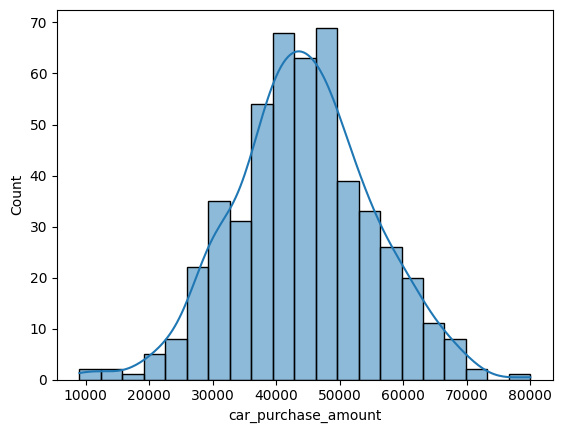

In [47]:
sns.histplot(data=df, x="car_purchase_amount", kde=True)

<Axes: xlabel='binned_car_purchase_amount', ylabel='Count'>

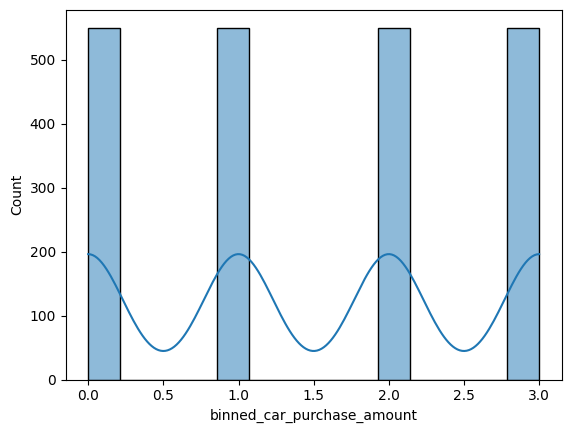

In [29]:
# this is to check if new distribution, 
# closer to balanced
# sns.histplot(data=df_resampled, x="car_purchase_amount", kde=True)
# sns.histplot(data=df, x="car_purchase_amount", kde=True)
sns.histplot(data=df_resampled, x="binned_car_purchase_amount", kde=True)

<h4>In the above 'binned_car_purchase_amount' it could be said that the distribution not that normal as it seems skewed-left at point
 2.0</h4>

In [48]:
print(df_resampled.columns)


Index(['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit_card_debt', 'net worth',
       'binned_car_purchase_amount', 'car_purchase_amount'],
      dtype='object')


In [49]:
df

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net worth,car_purchase_amount,binned_car_purchase_amount
0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505,35321.45877,0.0
1,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078,45115.52566,2.0
2,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773,42925.70921,2.0
3,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.164850,548599.0524,67422.36313,4.0
4,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671,55915.46248,4.0
...,...,...,...,...,...,...,...,...,...,...
995,41,87384.60,97729.16,837.79,185951.55,185951.55,6995.902524,541670.1016,NaN,3.0
996,38,123105.00,38790.92,23865.00,185760.92,185760.92,12301.456790,360419.0988,NaN,0.0
997,54,185724.50,0.00,0.00,185724.50,185724.50,10611.606860,764531.3203,NaN,4.0
998,59,185724.50,0.00,0.00,185724.50,185724.50,14013.034510,337826.6382,NaN,2.0


<b>Comparism to see how much the DataFrame is transformed </b>

In [50]:
# Check and compare to above df.describe()
df.describe()

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net worth,car_purchase_amount,binned_car_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000,1000.000000
mean,46.224000,151066.630020,34445.373900,25762.90812,211274.912040,211274.912040,9607.645049,431475.713625,44209.799218,2.000000
std,7.986339,44380.701089,37303.695356,33580.65929,34023.909619,34023.909619,3487.441195,173449.879360,10773.178744,1.414921
min,20.000000,25400.000000,0.000000,0.00000,185724.500000,185724.500000,100.000000,20000.000000,9000.000000,0.000000
25%,41.000000,116316.357500,0.000000,10161.33250,192696.077500,192696.077500,7397.515792,299824.195900,37629.896040,1.000000
50%,46.000000,140546.895000,24079.420000,17475.78500,200595.255000,200595.255000,9655.035568,426750.120650,43997.783390,2.000000
75%,52.000000,188314.510000,64893.007500,28726.08250,217400.320000,217400.320000,11798.867487,557324.478725,51254.709517,3.000000
max,70.000000,294580.020000,245131.880000,400184.25000,567595.430000,567595.430000,20000.000000,1000000.000000,80000.000000,4.000000


 
<h4>This is an indication that the dataset has been resampled to increase the number of rows from 500 to 1000, and the bins (binned_car_purchase_amount) are now uniformly represented.
The original distributions of the numerical columns features have not been significantly altered during this process.
The newly added column, binned_car_purchase_amount, shows a well-distributed representation across the bins.
Therefore, I would the dataset hasn't been transformed that much.</h4>

In [51]:
# Same for the variance too
# variance after
df.var()

age                           6.378161e+01
BasePay                       1.969647e+09
OvertimePay                   1.391566e+09
OtherPay                      1.127661e+09
TotalPay                      1.157626e+09
TotalPayBenefits              1.157626e+09
credit_card_debt              1.216225e+07
net worth                     3.008486e+10
car_purchase_amount           1.160614e+08
binned_car_purchase_amount    2.002002e+00
dtype: float64

<h4>Original features show that the variances have only slightly changed after resampling, demonstrating that the original distribution of data has been preserved well.
New feature (binned_car_purchase_amount) which was introduced as part of the binning and resampling process that happened to be the column that has a slight change.
The variance reflects the spread of the five uniform bins, which are now balanced across all categories.
Therefore, I would say, the resampling process successfully balanced the binned categories without significantly altering the spread of the original numerical columns have data consistency: .
And the new variance addition of binned_car_purchase_amount introduces a calculated variance, which is consistent with uniformly distributed categorical variable.</h4>

In [52]:
# Now for the correclation
df.corr()

,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit_card_debt,net worth,car_purchase_amount,binned_car_purchase_amount
age,1.000000,0.027126,-0.021949,0.018628,0.029704,0.029704,0.031748,0.021794,0.633273,0.606091
BasePay,0.027126,1.000000,-0.672868,-0.348767,0.222444,0.222444,-0.000827,0.047976,0.037602,0.012945
OvertimePay,-0.021949,-0.672868,1.000000,-0.025440,0.193601,0.193601,0.030913,-0.036167,-0.031566,-0.008004
OtherPay,0.018628,-0.348767,-0.025440,1.000000,0.504150,0.504150,0.048652,0.002825,-0.008536,0.001458
TotalPay,0.029704,0.222444,0.193601,0.504150,1.000000,1.000000,0.080833,0.025714,0.006014,0.009549
TotalPayBenefits,0.029704,0.222444,0.193601,0.504150,1.000000,1.000000,0.080833,0.025714,0.006014,0.009549
credit_card_debt,0.031748,-0.000827,0.030913,0.048652,0.080833,0.080833,1.000000,-0.049378,0.028882,0.019386
net worth,0.021794,0.047976,-0.036167,0.002825,0.025714,0.025714,-0.049378,1.000000,0.488580,0.450297
car_purchase_amount,0.633273,0.037602,-0.031566,-0.008536,0.006014,0.006014,0.028882,0.488580,1.000000,0.936366
binned_car_purchase_amount,0.606091,0.012945,-0.008004,0.001458,0.009549,0.009549,0.019386,0.450297,0.936366,1.000000


<h3>Before resampling:</h3>
<h4>age and car_purchase_amount have strong positive correlation (0.633), which indicated that the older individuals are more likely to spend higher on car purchases.
Also, BasePay and OvertimePay have strong negative correlation (-0.673), suggesting that higher base salaries are associated with lower overtime pay.
And, net worth and car_purchase_amount have moderate positive correlation (0.489), indicating that individuals with higher net worths tend to spend more on car purchases.
Other correlations are weaker (close to 0), reflecting minimal linear relationships.</h4>
<h3>After resampling:</h3>
<h4>Most of the correlation relationships between original columns like age, BasePay, and TotalPay remain nearly identical, as the resampling does not alter the distribution significantly in my opinion. However, with the new feature binned_car_purchase_amount it has few correlation with others such as; car_purchase_amount (0.936) has a very strong positive correlation, as the binned column is derived from car_purchase_amount. I think 'age' (0.606) too has moderate strong positive correlation, which I can say align with the strong correlation between age and car_purchase_amount. The net worth (0.450) has a moderate positive correlation, that reflect the same trend as the relationship between net worth and car_purchase_amount. Subsquently, there are weaker correlations with other variables like BasePay, TotalPay, and credit_card_debt indicate a limited relationship with the binned values.</h4>
<h4>Therefore, resampling and binning processes preserved the relationships in the dataset. I also think the binned_car_purchase_amount variable effectively captures the trends in car_purchase_amount while reducing its granularity to categories.</h4>






In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Preparing the data
# Also drop target column
X = df_resampled.drop(columns=['binned_car_purchase_amount'])  
y = df_resampled['binned_car_purchase_amount']  # Target column

# I then split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This is usually helps with boosting models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)






In [ ]:
# Then next is to train the XGBoost model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=len(y.unique()),  # Number of classes (bins)
    eval_metric='mlogloss',  # Log loss metric for multi-class classification
    use_label_encoder=False,  # Avoid the warning for label encoding
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,  # Depth of the trees
    learning_rate=0.1,  # Learning rate
    colsample_bytree=0.8,  # Fraction of features used at each tree
    subsample=0.8,  # Fraction of samples used for each tree
    gamma=0.1  # Minimum loss reduction required to make a further partition
)

# Training the model
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=5, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0, ...)

In [ ]:
# This actually evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


<Axes: >

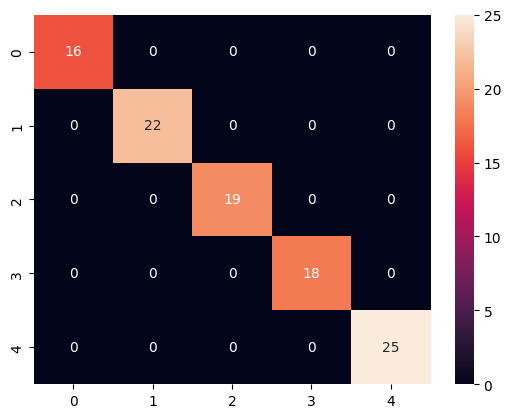

In [57]:
# sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        22
         2.0       1.00      1.00      1.00        19
         3.0       1.00      1.00      1.00        18
         4.0       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Model overall accuracy: 100.00%


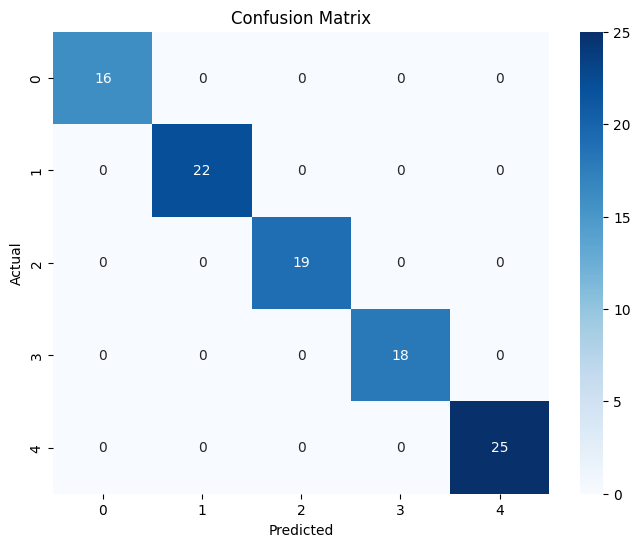

In [ ]:
# This is from ChatGPT

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=range(len(y.unique())), yticklabels=range(len(y.unique())))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()